# Decision Trees

In machine learning gli alberi decisionali sono strutture basati su due concetti chiavi:

- nodi: ovvero oggetti in grado di contenere informazioni
- link: collegamenti tra nodi che permettono di esprimere una possibile relazion

nel caso dei modelli decisional trees essi sono costituiti da questi tipi di elementi:

- I nodi che applicano una condizione sulle feature
- Branch o Edges che sono il risultato della condizione nei nodi e collegano i nodi tra di essi
- Nodi leaf che sono dei nodi terminali in cui l'albero prevede il risultato finale

Per comprendere meglio possiamo rappresentare un albero decisionale usando un modello grafico a nodi.

<div class="alert alert-block alert-warning">
    La libreria che userò è <a href="https://graphviz.org/">graphivz</a> per installarlo digitare nel anaconda prompt: <b>conda install python-graphviz, potrebbe essere necessario anche conda install graphviz</b>.
<\div>

In [1]:
from graphviz import Digraph

#create the graph
gra = Digraph()

#create the nodes
gra.node('first node condition', shape='box')
gra.node('left second node condition', shape='box')
gra.node('right second node condition', shape='box')
gra.node('output 1')
gra.node('output 2')
gra.node('output 3')
gra.node('output 4')

#creates the links
gra.edge('first node condition', 'left second node condition', label='True')
gra.edge('first node condition', 'right second node condition', label='False')
gra.edge('left second node condition', 'output 1', label='True')
gra.edge('left second node condition', 'output 2', label='False')
gra.edge('right second node condition', 'output 3', label='True')
gra.edge('right second node condition', 'output 4', label='False')

#save graph
gra.render(filename="tree_example", directory="../img", cleanup= True)
#show graph, decomment next line to show it
#gra

'../img\\tree_example.pdf'


Come possiamo vedere il modello ad albero applica **delle condizioni sulle feature che vengono scelte in base alla metrica per ottenere con il minor numero di condizioni l'output desiderato riducendone quanto più possibile l'inacuratezza**.<br>
Un particolare proprietà da sottolineare è il fatto che ***l'albero può essere utilizzato per fare classificazione o regressione*** per distiguenrli si definisce il:

- Decision Tree : albero decisionale in grado di classificare
- Decision Regression Tree: lbero decisionale in graado di fare una regressione

Dei parametri che di solito si usano:

- max depth : ovvero la profondità dell'albero per nodi impiegati
- criterion : il criterio usato per scegliere la feature su cui applicare la condizione con il rispettivo threshold

Sono presenti molti altri paramteri oltre ad essi, potete consutarli sia per __[decision tree regression](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor)__ che per __[decision tree classifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)__.

Prima di vedere le applicazioni di questi metodi, vediamo alcuni vantaggi e svantaggi.<br>

**Vantaggi**:

- facili da comprendere e interpretare nelle loro decisioni
- computazionalmente non troppo complesso
- utile anche in casi di più output

**Svantaggi:**

- Prono all'overfitting
- sono instabili poiché se i dati hanno piccole variazioni dal modello originale l'albero sarà diverso
- se ci sono classi dominanti l'albero può esserne fortemente influenzato

Ci sono molti altri punti che possono essere consultati da __[scikit](https://scikit-learn.org/stable/modules/tree.html)__ tra cui anche i possibili algoritmi di implementazione.

## Applicazione nei dataset già visti

Ora che abbiamo visto come sono fatti applichiamoli ai problemi di regressione e classificazione.
<div class="alert alert-block alert-warning">
    Purtroppo per esportare il pdf i grafici dei tree verranno messi con latex, per farveli venire dovete decommentare le righe dopo #plot the tree.
</div>

--------------------------------------------------------------------------------
R^2 score on training : 0.8291074278136426
R^2 score on testing : 0.5896855143056212
--------------------------------------------------------------------------------


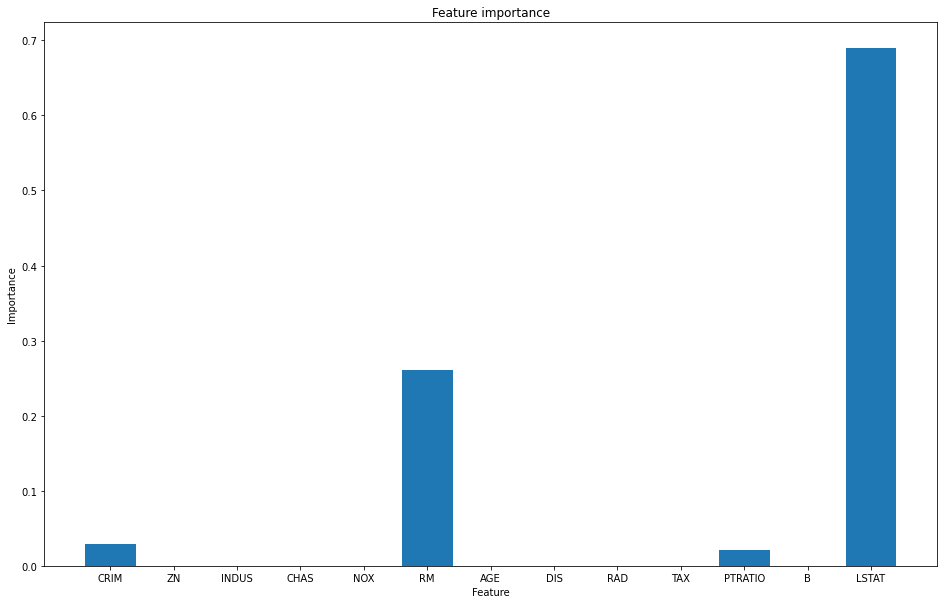

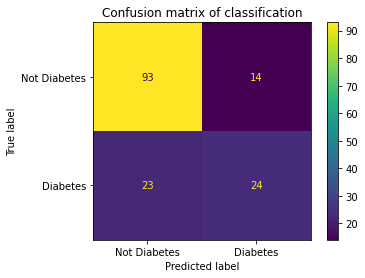

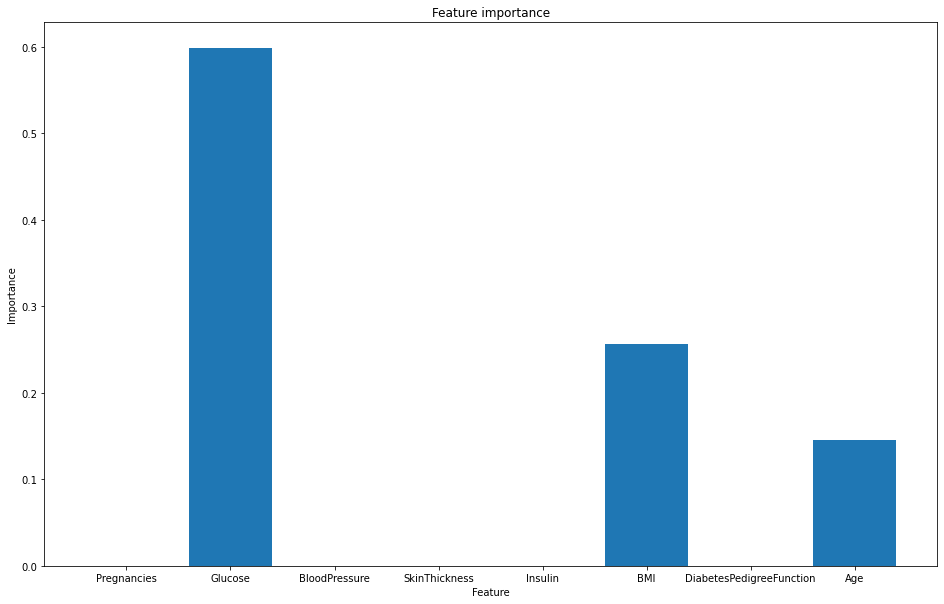

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree, export_graphviz, DecisionTreeClassifier, DecisionTreeRegressor 
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix

#regression data
boston = load_boston()
X_boston, y_boston = boston.data, boston.target

#classification data
diabetes = pd.read_csv('../data/diabetes2.csv')
X_diabetes, y_diabetes = diabetes.drop('Outcome', axis = 1).values, diabetes.Outcome.values
feature_diabetes = diabetes.columns.values[:-1]
target_names = ["Not Diabetes", "Diabetes"]

#divide the data in training and testing
X_boston_train, X_boston_test, y_boston_train, y_boston_test = train_test_split(
    X_boston, y_boston, random_state=0, test_size = 0.2)

X_diabetes_train, X_diabetes_test, y_diabetes_train, y_diabetes_test = train_test_split(
    X_diabetes, y_diabetes, random_state=0, test_size = 0.2)

#create the decision tree regressor
regr = DecisionTreeRegressor(max_depth=3)
regr.fit(X_boston_train, y_boston_train)

#plot the tree, decomment later this to block to show it in cell
#plt.figure(figsize=(16,10))
#plot_tree(regr, feature_names = boston.feature_names)
#plt.title("Decision Tree Regression on boston house prices")
#export the tree
#plt.savefig("../img/boston_tree.pdf")
#plt.show()


print("-"*80)
print(f'R^2 score on training : {regr.score(X_boston_train, y_boston_train)}')
print(f'R^2 score on testing : {regr.score(X_boston_test, y_boston_test)}')
print("-"*80)
plt.figure(figsize=(16,10))
plt.xticks(range(X_boston.shape[1]), boston.feature_names)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature importance')
plt.bar(range(X_boston.shape[1]), regr.feature_importances_) 
plt.show()

#create the decision tree classifier
clf = DecisionTreeClassifier(max_depth=3)
clf.fit(X_diabetes_train, y_diabetes_train)

#plot the tree
#plt.figure(figsize=(16,10))
#plot_tree(clf, feature_names = feature_diabetes)
#plt.title("Decision Tree Classifier on diabetes")
#plt.savefig("../img/daibetes_tree.pdf")
#plt.show()

plot_confusion_matrix(clf, X_diabetes_test, y_diabetes_test, display_labels=target_names)  
plt.title("Confusion matrix of classification")
plt.show()

plt.figure(figsize=(16,10))
plt.xticks(range(X_diabetes.shape[1]), feature_diabetes)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature importance')
plt.bar(range(X_diabetes.shape[1]), clf.feature_importances_) 
plt.show()


Per sapere tutto di cosa interpretare consultate questa __[documentazione](https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html#sphx-glr-auto-examples-tree-plot-unveil-tree-structure-py)__.

## Metodi ensemble

I problemi prima citati dei decision trees possono essere in qualche modo risolti utilizzando delle tecniche che sono usate anche per altri tipi di modelli sono i __[metodi ensemble](https://scikit-learn.org/stable/modules/ensemble.html)__, in cui la d'idea può essere riassunta come segue: **se un singolo modello fallisce, è possibile creare più modelli anche non dello stesso tipo e poi unire le loro previsioni** il punto è ***come combinare i modelli e su quale principio si basano?***<br>
Qualora consultaste il link appena mostrato potreste capire che i metodi ensemble si dividono in due tipi:

- averaging method: si creano diversi modelli indipendenti e si applica un tipo di media sulle previsioni di essi (questo in genere riduce la varianza)
- boosting method: partendo da un modello di base se ne creano di altri in modo da ridurne l'errore complessivo

Vediamolo per alcuni modelli di decision tree.

### Averaging methods on decision tree

#### Random Forest

Il termine __[Random Forest](https://en.wikipedia.org/wiki/Random_forest)__ si riferisce a un insieme di alberi decisionali in cui le regole di splitting sono ottenute facendo in prima battuta un __[bootstrap sample](https://www.analyticsvidhya.com/blog/2020/02/what-is-bootstrap-sampling-in-statistics-and-machine-learning/)__, ovvero noi prendiamo una piccola quantità del dataset randomicamente applichiamo il modello e ritorniamo il sample all'interno del dataset(questo tecnica di bootstrap con replacement è detta __[bagging](https://en.wikipedia.org/wiki/Bootstrap_aggregating)__)  da cui poi ne estraiamo un altro fino ad avere un numero di sample sufficiente e su ognuno di esse applichiamo il modello, ***per il nome random forest quello che succede è che da ogni sample noi estraiamo una feature randomica e poi otteniamo un threshold in grado di massimizzare la capacità di classificazione***, quindi **l'effetto randomico è apllicato sulla selezione delle feature**.<br>
Nella __[implementazione scikit del classificatore](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier)__ e la sua __[documentazione](https://scikit-learn.org/stable/modules/ensemble.html#forests-of-randomized-trees)__ potete trovare tutti i parametri e i dettagli, quello che a noi interessa è ***n_estimator che è il numero di alberi decisionali, bootstrap che dice di applicare il bagginf e il __[oob_score](https://en.wikipedia.org/wiki/Out-of-bag_error)__ (out-of-bag score) in cui una parte dei sample viene usata per valutare la capacità di generalizzazione del modello***.

#### Extra Trees

Il termine __[Extra Trees](https://scikit-learn.org/stable/modules/ensemble.html#forest)__ si riferisce sempre ad un altro metodo di ensemble averaging in cui la randomicità dell'albero è più accentuata rispetto alle Random forest, come spiegato __[qui](https://quantdare.com/what-is-the-difference-between-extra-trees-and-random-forest/)__, in sintesi quello che succede è che **gli extra trees non solo scelgono una feature randomica per ogni nodo, ma anche il threshold è scelto da una serie di valori randomica per il threshold tennedo conto solo del migliore a differenza delle Random Forest che scelgono il threshold migliore dal dataset**.

Sono presenti altri algoritmi come sempre consiltate la __[guida](https://scikit-learn.org/stable/modules/ensemble.html#forest)__.

### Boosting methods on decision trees

#### Adaboost 

Con __[Adaboost](https://scikit-learn.org/stable/modules/ensemble.html#adaboost)__ si intende un algoritmo chiamato Adaptive Boosting in cui sono inizializzato un numero definito di modelli come decision trees, ma potrebbero anche essere altri, in cui dei i modelli "deboli" ovvero modelli superiori solo leggermente al random guessing nella loro capacità di predire sono combinati. ***Ad ogni iterazione dell'algoritmo si associa un peso agli esempi per capire quali sono significaivi e si usa un peso per la capacità di predizione del singolo e verrà aggiornato come segue, se i modelli sono incapaci di predire un particolare dato il peso associato al dato sarà aumentato o nel caso opposto abbassato, mentre i modelli in grado di predire correttamente avranno il loro peso nella predizione aumentato.***<br>
Per una spiegazione completa rimando al __[link di andrea minini](http://www.andreaminini.com/ai/machine-learning/adaboost)__.

#### Gradient Tree Bosting

Detto anche gradient boosted decision tree(GBDT) si basa su **una metrica di loss funztion che deve essere minimizzata attraverso la creazione di nuovi modelli**.
Al fine di essere precisi potete immaginarvi di definire un primo DecisionTree in grado di classificare con una certo errore ovvero, ipotizziamo che abbiamo un primo modello detto $F_0$ in grado di classificare con un errore $\epsilon_0$, l'obiettivo dell'algoritmo sarà di creare un  nuovo albero $F_1$ in grado di combinare la predizione dell'albero precedemnte minimizzando la loss function ovvero $F_1 = F_0 + h_1(x)$ con $h_1 = argmin_{w} L_1$ in maniera tale da avere un errore $\epsilon_1 < \epsilon_0$ e ripetere fino ad ottenere l'errore desiderata, per info sull' implementazione matematica guardate __[qui](https://scikit-learn.org/stable/modules/ensemble.html#mathematical-formulation)__.

<div class="alert alert-block alert-success">
    Di recente scikit ha aggiunto anche un altro tipo di ensemble boosting detto <a href="https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.HistGradientBoostingClassifier.html#sklearn.ensemble.HistGradientBoostingClassifier">histgradientboosting</a> basato su <a href = "https://papers.nips.cc/paper/2017/hash/6449f44a102fde848669bdd9eb6b76fa-Abstract.html"> LightGBM </a> molto più veloce del classico Gradient boosting.
</div>

Time taken to train AdaBoostClassifier: 0.08403706550598145s 	
Time taken to train ExtraTreesClassifier(class_weight='balanced'): 0.15096259117126465s 	
Time taken to train RandomForestClassifier(class_weight='balanced'): 0.17799925804138184s 	
Time taken to train GradientBoostingClassifier: 0.13698816299438477s 	


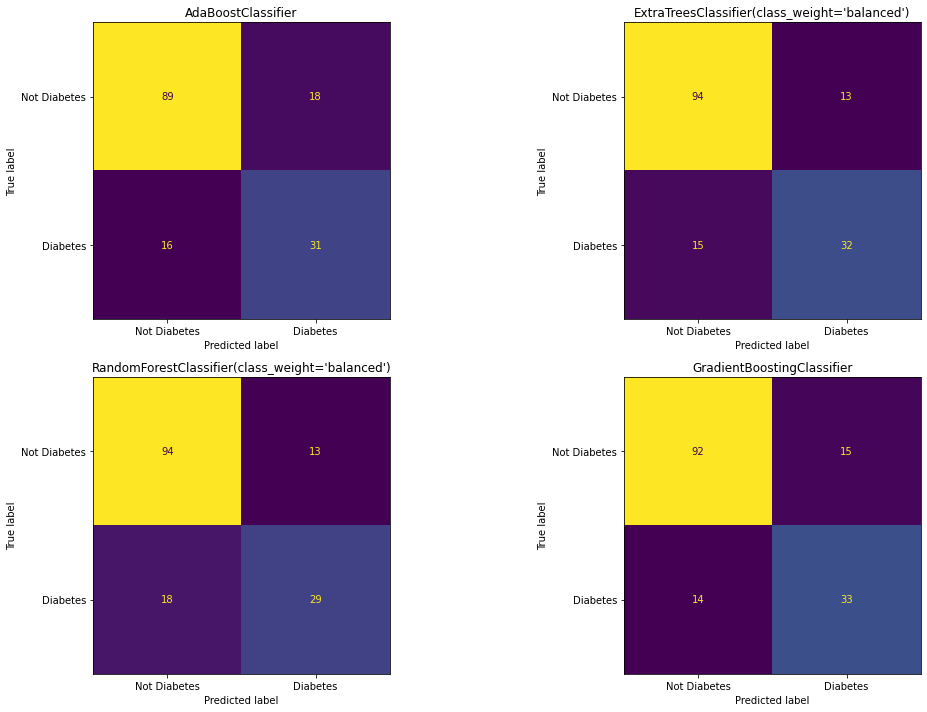

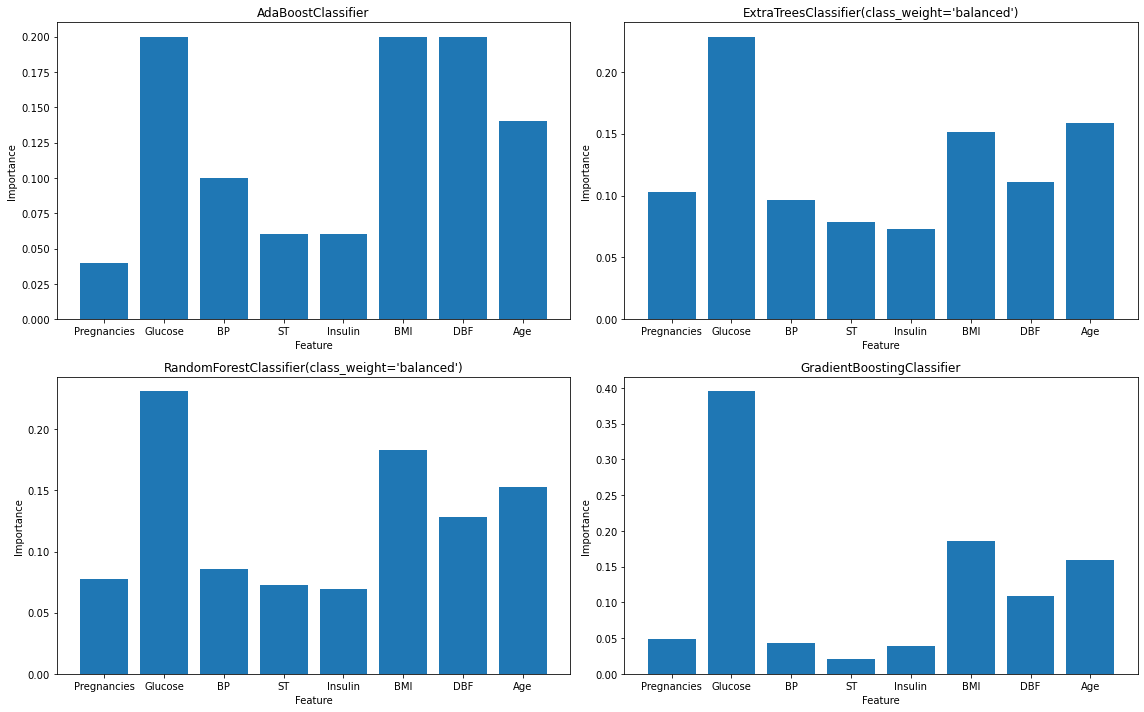

Classification report of AdaBoostClassifier

              precision    recall  f1-score   support

Not Diabetes       0.85      0.83      0.84       107
    Diabetes       0.63      0.66      0.65        47

    accuracy                           0.78       154
   macro avg       0.74      0.75      0.74       154
weighted avg       0.78      0.78      0.78       154

Classification report of ExtraTreesClassifier(class_weight='balanced')

              precision    recall  f1-score   support

Not Diabetes       0.86      0.88      0.87       107
    Diabetes       0.71      0.68      0.70        47

    accuracy                           0.82       154
   macro avg       0.79      0.78      0.78       154
weighted avg       0.82      0.82      0.82       154

Classification report of RandomForestClassifier(class_weight='balanced')

              precision    recall  f1-score   support

Not Diabetes       0.84      0.88      0.86       107
    Diabetes       0.69      0.62      0.65   

In [3]:
import time
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier

#wherever is required put that classes must be balanced to avoid biases on one class
clfs = [AdaBoostClassifier(), ExtraTreesClassifier(class_weight="balanced"),
        RandomForestClassifier(class_weight="balanced"), GradientBoostingClassifier()]

#classifiers fitting
for clf in clfs:
    start = time.time()
    clf.fit(X_diabetes_train, y_diabetes_train)
    print(f"Time taken to train {str(clf).replace('()','')}: {time.time() - start}s \t")

#confusion matrixes plots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16,10))

for clf, ax in zip(clfs, axes.flatten()):
    plot_confusion_matrix(clf, 
                          X_diabetes_test, 
                          y_diabetes_test, 
                          ax=ax,
                          display_labels=target_names,
                          colorbar= False)
    ax.title.set_text(str(clf).replace('()',''))
    
plt.tight_layout()  
plt.show()

#feature importance bar plots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16,10))

#let's abbreviate the feature names
feature_diabetes[2] = "BP" #BloodPressure
feature_diabetes[3] = "ST" #SkinTickness
feature_diabetes[6] = "DBF" #DiabetesPedigreeFunction

for clf, ax in zip(clfs, axes.flatten()):
    ax.bar(range(X_diabetes.shape[1]), clf.feature_importances_) 
    ax.set_xlabel('Feature')
    ax.set_ylabel('Importance')
    ax.title.set_text(str(clf).replace('()',''))
    ax.set_xticks(range(X_diabetes.shape[1]))
    ax.set_xticklabels(feature_diabetes)
    
plt.tight_layout()
plt.show()

#lets use a classification report
for clf in clfs:
    print(f"Classification report of {str(clf).replace('()','')}\n")
    print(classification_report(y_diabetes_test, clf.predict(X_diabetes_test), 
                                  target_names=target_names))


<div class="alert alert-block alert-success">
    I metodi ensemble e i decision tree possiedono anche funzioni come <b> predict_proba()</b> in cui il modello fornisce anche la probabilità di appartenenza alle classi
</div>

***

COMPLIMENTI AVETE FINITO LA LEZIONE SUI DECISION TREE!